<a href="https://colab.research.google.com/github/pranjal299/cv-project/blob/main/Dataset_Preproc_CROPPING_RESIZING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Make sure you have these folders as shortcuts in your drive -  
#/content/gdrive/MyDrive/DEPTH_INDIVIDUAL/

In [1]:
#Mount Google Drive 
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


### Starter Code

In [2]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK1-2.zip .

In [205]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK3-4.zip .

In [239]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK5-6.zip .

In [247]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK7-8.zip .

In [13]:
!cp /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/WEEK9-10.zip .

In [3]:
!unzip -qq WEEK1-2.zip -d .

In [206]:
!unzip -qq WEEK3-4.zip -d .

In [240]:
!unzip -qq WEEK5-6.zip -d .

In [248]:
!unzip -qq WEEK7-8.zip -d .

In [14]:
!unzip -qq WEEK9-10.zip -d .

In [5]:
import pandas as pd

In [250]:
coord = pd.read_csv('/content/gdrive/MyDrive/DEPTH_INDIVIDUAL/bounding_box_coordinates_Week1-10.csv')

In [258]:
# Filter out only specific weeks to see
#substrings = ['Week7/', 'Week8/']

#coord = coord[coord['Image Path'].str.contains('|'.join(substrings))]

"# define a list of substrings to match\nsubstrings = ['Week7/', 'Week8/']\n\n# filter the dataframe based on column A containing any of the substrings\ncoord = coord[coord['Image Path'].str.contains('|'.join(substrings))]"

In [252]:
coord

,Image Path,ymin,xmin,ymax,xmax
51893,Week7/20211027/20211027_3342/_Depth_4322.png,0.002959,0.599901,0.632498,0.884000
51894,Week7/20211027/20211027_3342/_Depth_3586.png,0.194382,0.038926,0.562579,0.315737
51895,Week7/20211027/20211027_3342/_Depth_3863.png,0.338018,0.260477,0.709990,0.786195
51896,Week7/20211027/20211027_3342/_Depth_3910.png,0.310720,0.036336,0.627554,0.313587
51897,Week7/20211027/20211027_3342/_Depth_4042.png,0.211914,0.039788,0.622377,0.337500
...,...,...,...,...,...
79577,Week8/20211103/20211103_3385/_Depth_8826.png,0.420558,0.647108,1.000000,0.914583
79578,Week8/20211103/20211103_3385/_Depth_8407.png,0.398907,0.621025,1.000000,0.900527
79579,Week8/20211103/20211103_3385/_Depth_7761.png,0.366236,0.749957,1.000000,0.955775
79580,Week8/20211103/20211103_3385/_Depth_8175.png,0.000801,0.391090,0.275984,0.849583


### Taking an example image

In [194]:
sam = coord[coord['Image Path'] == 'Week9/20211112/20211112_3342/_Depth_2470.png']

In [195]:
#sample = coord.sample(1).iloc[0].tolist()

In [196]:
#image_path = sample[0]
#y_min = float(sample[1])
#x_min = float(sample[2])
#y_max = float(sample[3])
#x_max = float(sample[4])

'image_path = sample[0]\ny_min = float(sample[1])\nx_min = float(sample[2])\ny_max = float(sample[3])\nx_max = float(sample[4])'

In [197]:
image_path = list(sam['Image Path'])[0]
y_min = list(sam['ymin'])[0]
x_min = list(sam['xmin'])[0]
y_max = list(sam['ymax'])[0]
x_max = list(sam['xmax'])[0]

In [198]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(720, 1280, 3)


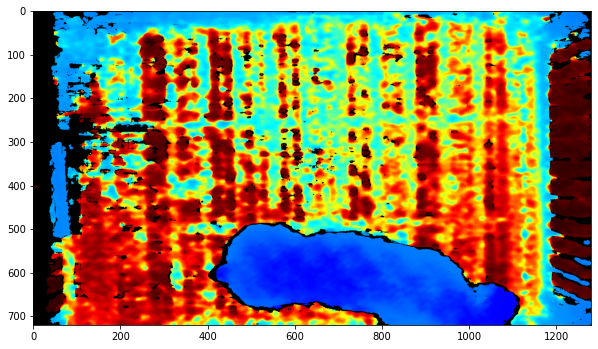

In [199]:
image = cv2.imread(image_path)
print(image.shape)
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [56]:
def display_image_with_box(ymin, xmin, ymax, xmax, image_path):
    # Load the image from the file path
    image = cv2.imread(image_path)
    image_copy = image.copy()

    # Get the height and width of the image
    height, width, _ = image.shape

    # Unnormalize the bounding box coordinates
    ymin_pixel = int(ymin * height)
    xmin_pixel = int(xmin * width)
    ymax_pixel = int(ymax * height)
    xmax_pixel = int(xmax * width)

    print((xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel))

    # Draw the bounding box on the image
    image_with_box = cv2.rectangle(image, (xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel), (0, 0, 0), thickness=4)

    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop out the square bounding box
    rect_box = image_copy[ymin_pixel:ymax_pixel, xmin_pixel:xmax_pixel]
    print(rect_box.shape)
    
    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(rect_box, cv2.COLOR_BGR2RGB))
    plt.show()

(415, 507) (1135, 714)


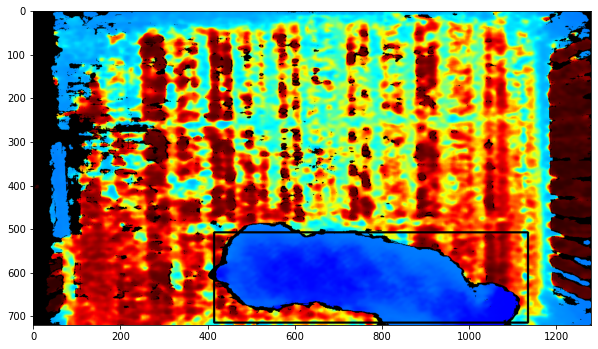

(207, 720, 3)


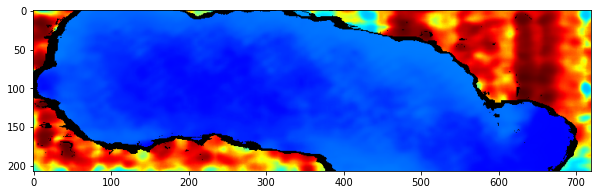

In [57]:
display_image_with_box(y_min, x_min, y_max, x_max, image_path)

### Prototyping for a single image (plotting unshifted square bounding box on original image and cropped out)

In [58]:
def display_image_with_box(ymin, xmin, ymax, xmax, image_path):
    # Load the image from the file path
    image = cv2.imread(image_path)
    image_copy = image.copy()

    # Get the height and width of the image
    height, width, _ = image.shape

    # Unnormalize the bounding box coordinates
    ymin_pixel = int(ymin * height)
    xmin_pixel = int(xmin * width)
    ymax_pixel = int(ymax * height)
    xmax_pixel = int(xmax * width)

    # Compute the width and height of the bounding box
    width_pixel = xmax_pixel - xmin_pixel
    height_pixel = ymax_pixel - ymin_pixel

    # Determine whether to adjust the box vertically or horizontally
    if width_pixel > height_pixel:
        # Adjust the box vertically
        difference = width_pixel - height_pixel
        ymin_pixel -= difference // 2
        ymax_pixel += difference // 2
    else:
        # Adjust the box horizontally
        difference = height_pixel - width_pixel
        xmin_pixel -= difference // 2
        xmax_pixel += difference // 2

    # Make sure the box is still inside the image
    ymin_pixel = np.clip(ymin_pixel, 0, height)
    ymax_pixel = np.clip(ymax_pixel, 0, height)
    xmin_pixel = np.clip(xmin_pixel, 0, width)
    xmax_pixel = np.clip(xmax_pixel, 0, width)

    # Draw the bounding box on the image
    image_with_box = cv2.rectangle(image, (xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel), (0, 0, 0), thickness=4)
    print((xmin_pixel, ymin_pixel), (xmax_pixel, ymax_pixel))

    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop out the square bounding box
    square_box = image_copy[ymin_pixel:ymax_pixel, xmin_pixel:xmax_pixel]
    print(square_box.shape)

    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(square_box, cv2.COLOR_BGR2RGB))
    plt.show()

(415, 251) (1135, 720)


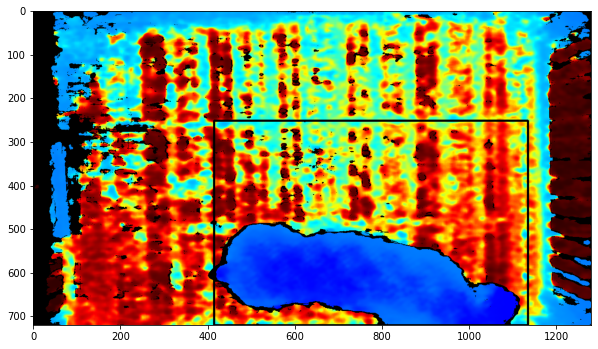

(469, 720, 3)


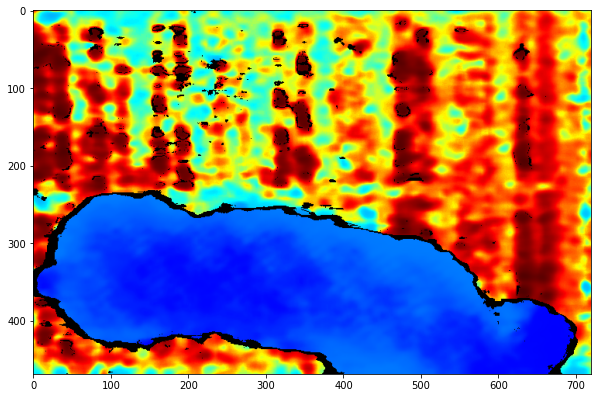

In [59]:
display_image_with_box(y_min, x_min, y_max, x_max, image_path)

### Prototyping for a single image (plotting translated square bounding box on original image and cropped out)

In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max):
    # Load the image from the file path
    image = cv2.imread(image_path)
    image_copy = image.copy()
    
    # Get the height and width of the image
    image_height, image_width, _ = image.shape
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    box_size = int(max(box_height, box_width))
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0

    # Draw the bounding box on the image
    image_with_box = cv2.rectangle(image, (xmin_new, ymin_new), (xmax_new, ymax_new), (0, 0, 0), thickness=4)
    print((xmin_new, ymin_new), (xmax_new, ymax_new))
    
    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop image to square bounding box
    cropped_image = image_copy[ymin_new:ymax_new, xmin_new:xmax_new]
    print(cropped_image.shape)
    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()

(415, 0) (1135, 720)


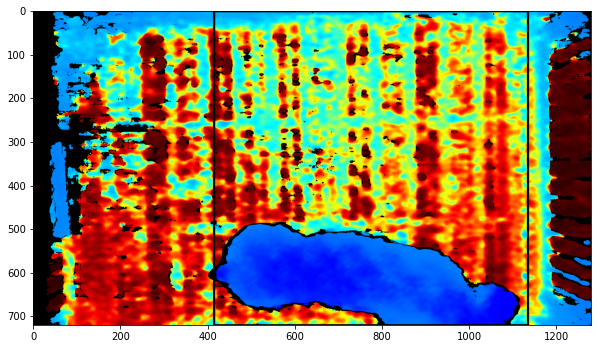

(720, 720, 3)


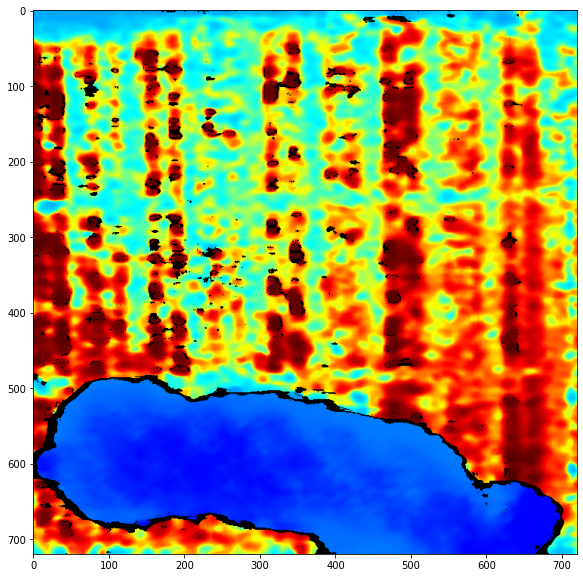

In [61]:
display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max)

### Prototyping for a single image (plotting translated square bounding box on original image and cropped out - given size)

In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max, box_size):
    # Load the image from the file path
    image = cv2.imread(image_path)
    image_copy = image.copy()
    
    # Get the height and width of the image
    image_height, image_width, _ = image.shape
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    if box_size > max(box_height, box_width):
        box_size = int(box_size)
    else:
        box_size = int(box_size)
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0

    # Draw the bounding box on the image
    image_with_box = cv2.rectangle(image, (xmin_new, ymin_new), (xmax_new, ymax_new), (0, 0, 0), thickness=4)
    print((xmin_new, ymin_new), (xmax_new, ymax_new))
    
    # Display the image with the bounding box overlaid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(image_with_box, cv2.COLOR_BGR2RGB))
    plt.show()

    # Crop image to square bounding box
    cropped_image = image_copy[ymin_new:ymax_new, xmin_new:xmax_new]
    print(cropped_image.shape)

    # Display the cropped image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()

(461, 92) (1089, 720)


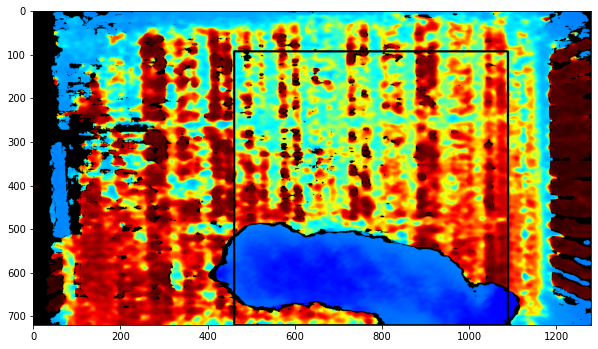

(628, 628, 3)


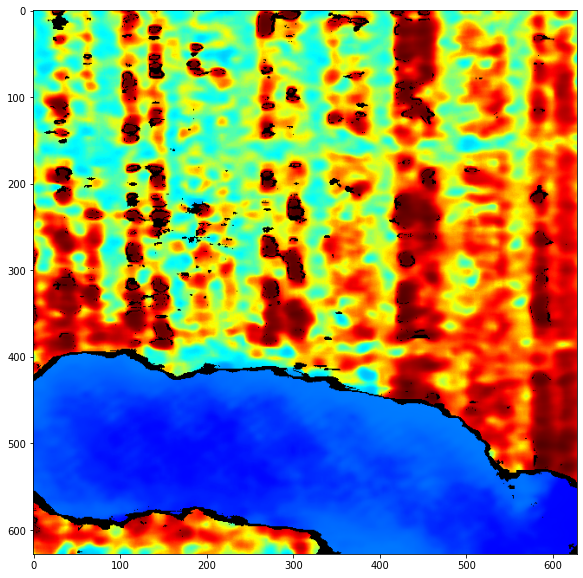

In [63]:
display_image_with_square_bbox(image_path, y_min, x_min, y_max, x_max, 628)

### Finding out size of largest square bounding box

In [66]:
import numpy as np

def compute_square_size(y_min, x_min, y_max, x_max):
    # Load the image from the file path
    
    # Get the height and width of the image
    image_height, image_width, _ = image.shape
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    box_size = int(max(box_height, box_width))
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0
    
    return image[ymin_new:ymax_new, xmin_new:xmax_new].shape[0]

In [67]:
image = np.zeros([720, 1280, 3])

In [183]:
sizes = []
image_paths = []

for index, sample in coord.iterrows():
  image_path = sample[0]
  y_min = float(sample[1])
  x_min = float(sample[2])
  y_max = float(sample[3])
  x_max = float(sample[4])
  size = compute_square_size(y_min, x_min, y_max, x_max)
  sizes.append(size)
  image_paths.append(image_path)

In [184]:
sizes, image_paths = (list(t) for t in zip(*sorted(zip(sizes, image_paths))))

In [185]:
sizes[-1]

720

In [186]:
image_paths[-1]

'Week9/20211112/20211112_3342/_Depth_2470.png'

### Removing images with pig at the edges

In [165]:
coord_pixels = coord.copy()

In [167]:
coord_pixels['ymax'] = coord_pixels['ymax']*720

In [168]:
coord_pixels['ymin'] = coord_pixels['ymin']*720

In [169]:
coord_pixels['xmax'] = coord_pixels['xmax']*1280

In [170]:
coord_pixels['xmin'] = coord_pixels['xmin']*1280

In [175]:
df = coord_pixels.copy()

lower_bound = 1.3
upper_bound = 1.3

df = df[(df['ymin'] > lower_bound) & (df['ymin'] < 720-upper_bound) &
        (df['ymax'] > lower_bound) & (df['ymax'] < 720-upper_bound) &
        (df['xmin'] > lower_bound) & (df['xmin'] < 1280-upper_bound) &
        (df['xmax'] > lower_bound) & (df['xmax'] < 1280-upper_bound)]

In [177]:
coord_clean = df.copy()

In [179]:
coord_clean['ymax'] = coord_clean['ymax']/720
coord_clean['ymin'] = coord_clean['ymin']/720
coord_clean['xmax'] = coord_clean['xmax']/1280
coord_clean['xmin'] = coord_clean['xmin']/1280

In [182]:
coord_clean.to_csv('/content/gdrive/MyDrive/DEPTH_INDIVIDUAL/clean_bounding_box_coordinates_Week1-10.csv',index=False)

### Cropping out images and saving

In [245]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def crop_square_box(image_path, y_min, x_min, y_max, x_max, box_size):
    # Load the image from the file path
    image = cv2.imread(image_path)
    
    # Get the height and width of the image
    image_height, image_width, _ = image.shape
    
    # Compute the width and height of the rectangular bounding box
    box_height = (y_max - y_min) * image_height
    box_width = (x_max - x_min) * image_width
    
    # Determine the center of the rectangular bounding box
    center_y = int((y_min + y_max) * image_height / 2)
    center_x = int((x_min + x_max) * image_width / 2)
    
    # Compute the size of the square bounding box
    if box_size > max(box_height, box_width):
        box_size = int(box_size)
    else:
        box_size = int(box_size)
    
    # Compute the coordinates of the square bounding box
    ymin_new = max(center_y - box_size // 2, 0)
    xmin_new = max(center_x - box_size // 2, 0)
    ymax_new = ymin_new + box_size
    xmax_new = xmin_new + box_size
    
    # If the square bounding box is outside the image, shift it towards the inside
    if ymax_new > image_height:
        ymin_new -= ymax_new - image_height
        ymax_new = image_height
    if xmax_new > image_width:
        xmin_new -= xmax_new - image_width
        xmax_new = image_width
    if ymin_new < 0:
        ymax_new += ymin_new
        ymin_new = 0
    if xmin_new < 0:
        xmax_new += xmin_new
        xmin_new = 0

    # Crop image to square bounding box
    cropped_image = image[ymin_new:ymax_new, xmin_new:xmax_new]

    return cropped_image

In [246]:
from tqdm import tqdm
import os

for index, sample in tqdm(coord.iterrows(), total=len(coord)):
  image_path = sample[0]
  y_min = float(sample[1])
  x_min = float(sample[2])
  y_max = float(sample[3])
  x_max = float(sample[4])
  img = crop_square_box(image_path, y_min, x_min, y_max, x_max, box_size=720)
  cv2.imwrite(image_path.replace('.png','.jpg'),img)
  os.remove(image_path)

100%|██████████| 23329/23329 [20:54<00:00, 18.59it/s]


In [ ]:
!zip -r CROPPED_WEEK1-10_720.zip Week1 Week2 Week3 Week4 Week5 Week6 Week7 Week8 Week9 Week10

In [255]:
!mv CROPPED_WEEK1-10_720.zip /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/CROPPED/

### Resizing

In [261]:
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import os
from glob import glob

dim = (256,256)

for PATH in ['Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10']:
    print(PATH)
    result = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.jpg'))]
    for img in tqdm(result):
      image = cv2.imread(img)
      os.remove(img)
      image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      cv2.imwrite(img,image)

Week1


100%|██████████| 1013/1013 [00:22<00:00, 45.44it/s]


Week2


100%|██████████| 5773/5773 [01:45<00:00, 54.47it/s]


Week3


100%|██████████| 11785/11785 [01:54<00:00, 102.76it/s]


Week4


100%|██████████| 9993/9993 [01:38<00:00, 101.73it/s]


Week5


100%|██████████| 9388/9388 [01:26<00:00, 109.11it/s]


Week6


100%|██████████| 13941/13941 [02:36<00:00, 89.17it/s] 


Week7


100%|██████████| 13590/13590 [02:06<00:00, 107.73it/s]


Week8


100%|██████████| 14099/14099 [02:14<00:00, 105.17it/s]


Week9


100%|██████████| 12183/12183 [01:52<00:00, 108.12it/s]


Week10


100%|██████████| 13745/13745 [02:05<00:00, 109.91it/s]


In [262]:
!zip -r CROPPED_WEEK1-10_256.zip Week1 Week2 Week3 Week4 Week5 Week6 Week7 Week8 Week9 Week10

Streaming output truncated to the last 5000 lines.
  adding: Week10/20211119/20211119_3384/_Depth_12112.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11419.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11905.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11745.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11899.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11591.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11298.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11866.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11711.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11796.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11612.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11594.jpg (deflated 1%)
  adding: Week10/20211119/20211119_3384/_Depth_11724.jpg (deflated 1%)
  adding: Week10/20211119/

In [263]:
!mv CROPPED_WEEK1-10_256.zip /content/gdrive/MyDrive/DEPTH_INDIVIDUAL/CROPPED/